# HW2

Write a program to plot
\begin{equation}
f(x)=\pi/2+2*(sin(x)+sin(3x)/3+sin(5x)/5+....sin(nx)/n)
\end{equation}
from -$\pi$ to $\pi$. Choose n=11, 21 and 31 and plot all these three curves in one figure. Please use numpy library and matplotlib.

Then commit this to your github.

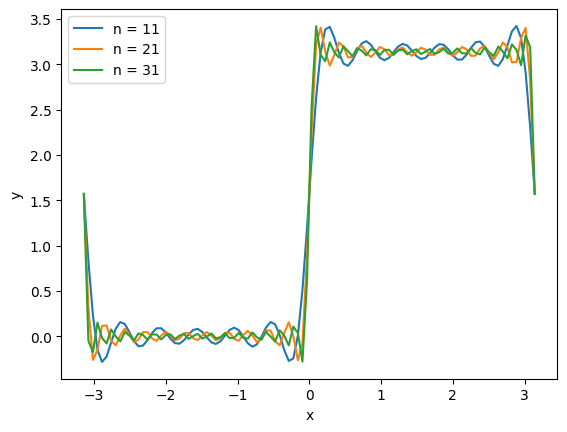

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N_TO_USE = [11,21,31]
LEN_X = 100

def get_i(n)->np.ndarray:
    """
    Get all odd values between 1 and n
    
    Parameters
    ----------
    n : int
        The upper bound of the range.
    
    Returns
    -------
    np.ndarray
        An array of all odd values between 1 and n.
    """
    if n % 2 == 0:
        raise ValueError('n must be an odd number')
    return np.arange(1,n+2,2)

def test_get_i():
    assert np.all(get_i(5) == np.array([1, 3, 5]))
    assert np.all(get_i(7) == np.array([1, 3, 5, 7]))
    assert np.all(get_i(9) == np.array([1, 3, 5, 7, 9]))
test_get_i()

def f(x:np.ndarray,n:int)->np.ndarray:
    """
    The function to plot
    
    Parameters
    ----------
    x : np.ndarray
        The array of x values.
    n : int
        The highest order of :math:`\\sin{(ix)}/i`
    
    Returns
    -------
    np.ndarray
        The y values of the function
    """
    def g(x,i):
        return np.sin(i*x)/i
    y:np.ndarray = np.array(
        [
            g(x,i) for i in get_i(n)
        ]
    ).sum(axis=0)
    
    if not y.shape == x.shape:
        raise ValueError('y and x must have the same shape')
    
    return 0.5*np.pi + 2*y

x = np.linspace(-np.pi,np.pi,LEN_X)
for n in N_TO_USE:
    y = f(x,n)
    plt.plot(x,y,label=f'n = {n}')
plt.legend()
plt.xlabel('x')
_=plt.ylabel('y')
